# Complexheatmap - DE analysis for clinical phenotype and celltypes

## PARAMETERS

In [1]:
# ##################################################################
# 'TMA.block'
# 'ROI.size'
# 'Ventricle'
# 'Segment.id'
# 'Segment.type' -> "celltype"
# 'PID'
# 'Operation'
# 'Fixation.interval'
# 'Gender'
# 'Age'
# 'Institute'
# 'Clinical_phenotype_path'
# 'Clinical_endstage'
# 'After_LVAD'
# 'P_Normal'
# 'P_Degeneration''P_Hypertrophy''P_Disarray''P_Fibrosis''P_peri_infarction''P_etc'
# 'Echo_date''Echo_LVEF''Echo_LVPWd''Echo_IVSd''Echo_chamber_size''Echo_RWMA''Echo_RV_dysfunction''Echo_AR''Echo_MR''Echo_TR'
# 'ECG_date''ECG_voltage''ECG_QRS''VTandVF''AF''BNP''Probnp''CardiacMR_DE''Gene'
# 'ECG_voltage_n''ECG_QRS_n'
# 'Core.c.fullROI'
# 'PID.Op''PID.Op.bothblock''ROI.bothsize'
# 'Clinical_phenotype_LV''Clinical_phenotype_tri''Clinical_phenotype_bi'

# Number of core to use for DREAM analysis
 NoCore = 16 # 8

# # Condition of interest (among column names of met)
  COI <- "celltype"   # COI <- "celltype" 
    # COI <- "celltype" 
# USING ONLY SPECIFIC SET of CORES - For example cores with full ROI 
  # FullROI_selection <- "Y"
  FullROI_selection <- "N"

# CELL TYPE SELECTION?
  # celltype_selection <- "N" 
  celltype_selection <- "Y"  

  # Which celltype? 
        cell_type<- c("Endothelial_cells", "Cardiomyocytes") # or ...'Endothelial_cells''Cardiomyocytes''No_segmentation''Fibroblasts'
        cell_type_nm <- if(celltype_selection == "Y") {cell_type_nm = paste(cell_type, collapse="_")
                                                       }else{cell_type_nm = "Non"
                                                             }

# ROISIZE SELECTION?
 ROISIZE_selection <- "Y" # or "N"
 ROIsize <- "large" # or ...

# VENTRICLE SELECTION?
    # ventricle_selection <- "N"
    ventricle_selection <- "Y" # or "N"
    ventricle_type <- "LV"

# Clinical Disease selection with control samples

    disease_selection <- "Y"
    # disease_selection <- "N"

    disease_selection_var <- "Clinical_phenotype_LV"
    disease_type_vector <- c("Control", "ICMP")  ## Clinical_phenotype_LV - 'ES_HCMP''ICMP''Control''DCMP''NES_HCMP'
    disease_type <- if(disease_selection == "Y") {disease_type = disease_type_vector
                                                  }else{disease_type= "Non"
                                                       }

# OUTLIER SELECTION?
 # if no 
  grid_set = "Y" 
  # grid_set = "N"

 # choose which grid set to use from the PCAgrid()
if (grid_set == "N") {
    outlier_set = "N"
    } else {
    outlier_set =  "pcaplot_outlier" #"pca_grid_10"# "pca_grid_10" # or pca_grid_10, pca_grid_3, etc
}

RE1 = "PID"
RE2 = "Institute"
RE3 = "Fixation.interval"
# RE4 = "P_Normal"
# RE4 = "Clinical_phenotype_LV"
# RE4 = "..." 
#...

if (exists("RE4")==TRUE) {
    (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
    (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ") + (1|", RE4, ")", collapse="")))
# RE names
    (RE_names <- paste(RE1, RE2, RE3, RE4, sep="_"))
    }else{
    if (exists("RE3")==TRUE) {
        (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))
        (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ") + (1|", RE3, ")", collapse="")))

# RE names
        (RE_names <- paste(RE1, RE2, RE3, sep="_"))
        }else{
        if (exists("RE2")==TRUE) {
            (form <- formula(paste("~", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))
            (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ") + (1|", RE2, ")", collapse="")))

# RE names
            (RE_names <- paste(RE1, RE2, sep="_"))
            }else{
            if (exists("RE1")==TRUE) {
                (form <- formula(paste("~", "condition + (1|", RE1, ")", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition + (1|", RE1, ")", collapse="")))

# RE names
                (RE_names <- paste(RE1, sep="_"))
                }else{
                (form <- formula(paste("~", "condition", collapse="")))
                (form_cont <- formula(paste("~ 0 +", "condition", collapse="")))

# RE names
                (RE_names <- paste(No, sep="_"))
                }
        }
    }
}
                
# Decide Contrast for DREAM

# makecontrastasroutine <- "celltype_comwith_othercells" 
makecontrastasroutine <- "Forclinicaldisease" # or "Y" to make it according to the number of condition
# makecontrastasroutine <- "Y" #to make it according to the number of condition

# Small sample number analysis 
 KRanaly <- "Y"
 # KRanaly <- "N"
# Order of batch correction
# Cell-type selection -> Batch correction

# Outlier 
# remove Sejong
# Normalization method = Upper quartile 
# ##################################################################

[1] "PID_Institute_Fixation.interval"

In [2]:
(Analysis_name = paste("SejongIn_", COI, "_FullROI_", FullROI_selection, 
                      "_cellselection_", celltype_selection,
                                "_", cell_type_nm, 
                                "_ROI_", ROIsize,
                                "_Vent_", ventricle_type,
                                "_DsSelect_", paste0(disease_type, "_", collapse="_"), disease_selection, 
                                "_", "OL_", outlier_set,
                                "_RE_", RE_names,
                                "_KR_", KRanaly,
                      Sys.Date(), sep=""))

[1] "SejongIn_celltype_FullROI_N_cellselection_Y_Endothelial_cells_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_Control__ICMP_Y_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-23"

# PREPARATION

## Set up library

In [3]:
# R.Version()
# BiocManager::install(version = "3.14")
# BiocManager::install("sva")
# BiocManager::install("ggplot2")
# BiocManager::install("gridExtra")
# BiocManager::install("edgeR")
# BiocManager::install("UpSetR")
# BiocManager::install("tidyverse")
# BiocManager::install("BatchQC")
# BiocManager::install("RUVSeq")
# BiocManager::install("RColorBrewer")
# BiocManager::install("Glimma")
# BiocManager::install("variancePartition")
# BiocManager::install("BiocParallel")
# install.packages("gplots")
# install.packages("NMF")
# BiocManager::install("GO.db")
# BiocManager::install("org.Hs.eg.db")
# devtools::install_github("GabrielHoffman/variancePartition")
# remotes::install_github("valentint/rrcov")
# BiocManager::install("GSA")
# BiocManager::install("RCurl")
# BiocManager::install("RCy3")

In [4]:
library("sva")
library("ggplot2")
library("gridExtra")
library("edgeR")
library("UpSetR")
library("tidyverse")
library("BatchQC")
library("RColorBrewer")
library("Glimma")
library("variancePartition")
library("BiocParallel")
library("gplots")
library("NMF")
library("GO.db")
library("org.Hs.eg.db")
library(preprocessCore)
library(genefilter)
library(matrixStats)
library(rafalib)
library(PCAtools)
library(Biobase)
library(GEOquery)
library(bigutilsr)
library(spatstat)
library(matrixStats)
library(RCurl)
library(GSA)
library(RCy3)
library(fgsea)
library(data.table)
# library(plotly) # has conflict with org.Hs.eg.db select
# library(rrcov) # has conflict with biplot detach(rrcov)
library(DT) 
library(grid)
library(ComplexHeatmap)
library(cluster)

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: limma

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.0
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::combine()  masks gridExtra::combine()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ readr::spec()     masks genefilter::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required packag

In [5]:
options(repr.plot.width=20, repr.plot.height=10)


## FUNCTIONS

### Function to select groups according to phenotype

In [6]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Segment.id"
# Y="Cardiomyocytes"
# W="p"
# Z="e_abc"

select_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_"),df_p[df_p[[x]]==y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"


### Function to remove group according to a phenotype

In [7]:
# if want to choose phenotpye dataset w, colname x , variable y, expressiondataset z)
# example 
# X="Institute"
# Y="Sejong"
# W="met"
# Z="exp_rmnp"

remove_group <- function(x,y,w,z){
    df_p <- get(w)
    
assign(paste(w, y, sep="_rm_"),df_p[df_p[[x]]!=y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_rm_"))

assign(paste(z, y, sep="_rm_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_rm_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes"
# [1] "and the sample count in phenotype data is 91"
# [1] "the file name of the expression data is e_abc_Cardiomyocytes"
# [1] "and the sample count in expression data is 91"

### Function to select groups according to multiple phenotypes

In [8]:
# if want to choose phenotpye dataset w, colname x , vector of variables y, expressiondataset z)
# example ## select Control, HCMP only
# HCMPs <- c('Control','ES_HCMP', 'NES_HCMP') # Name of phenotypes to compare
# X="Clinical_phenotype_2nd"
# Y="HCMPs"
# W="p_Cardiomyocytes_rm_sp_gridflag_large_LV"
# Z="e_cmc_cb_rm_sp_gridflag_large_LV"

select_group_m <- function(x,y,w,z){
    df_p <- get(w)
    df_y <- get(y)
assign(paste(w, y, sep="_"),df_p[df_p[[x]]%in%df_y,], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    # use [[]] instaed of $
    df_e <- get(z)
    df_p_new <- get(paste(w, y, sep="_"))

assign(paste(z, y, sep="_"), df_e[,colnames(df_e)%in%rownames(df_p_new)], envir = parent.frame())    
    df_e_new <- get(paste(z, y, sep="_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", w, "_", y, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_", y, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in phenotype data is 30"
# [1] "the file name of the expression data is e_cmc_cb_rm_sp_gridflag_large_LV_HCMPs"
# [1] "and the sample count in expression data is 30"


### Function to remove specific samples 

In [9]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
remove_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_rm_"), df_p[!(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_rm_"))

assign(paste(z, x, sep="_rm_"), df_e[,!(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_rm_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_rm_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_rm_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to select specific samples

In [10]:
# if want to choose phenotpye dataset y, vector of samples to remove x, expressiondataset z)
# example vectors from pca_grid 
# sp_gridflag <-names(pca_grid_all$flag[pca_grid_all$flag==FALSE])
# X="sp_gridflag"
# Y="p_Cardiomyocytes"
# Z="e_cmc_cb_nl"
# df_p[!(rownames(df_p)%in%df_s),]
# df_e[,!(colnames(df_e)%in%df_s)]
select_sample <- function(x,y,z){
    df_p <- get(y)
    df_e <- get(z)
    df_s <- get(x)
# new phenotype dataset    
assign(paste(y, x, sep="_w_"), df_p[(rownames(df_p)%in%df_s),], envir = parent.frame()) # envir = parent.frame() to use the new variable out of function
    # use assign instaed of <- due to paste make "" 
    df_p_new <- get(paste(y, x, sep="_w_"))

assign(paste(z, x, sep="_w_"), df_e[,(colnames(df_e)%in%df_s)], envir = parent.frame())    
    df_e_new <- get(paste(z, x, sep="_w_"))

print(paste("the samples in phenotype and expression data is identical:", identical(colnames(df_e_new), rownames(df_p_new))))

print(paste("the file name of the phenotype data is ", y, "_w_", x, sep=""))
print(paste("and the sample count in phenotype data is", dim(df_p_new)[1]))
print(paste("the file name of the expression data is ", z, "_w_", x, sep=""))
print(paste("and the sample count in expression data is", dim(df_e_new)[2]))
    }

# # example of the outcome
# [1] "the samples in phenotype and expression data is identical: TRUE"
# [1] "the file name of the phenotype data is p_Cardiomyocytes_rm_sp_gridflag"
# [1] "and the sample count in phenotype data is 86"
# [1] "the file name of the expression data is e_cmc_cb_nl_rm_sp_gridflag"
# [1] "and the sample count in expression data is 86"

### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)

In [11]:
### Function to compare two sample's correlation - 1 : qqplot_bc_nl(x,y)
## my first function
## making function par(mfrow=c(2,2))
qqplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with qqplot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
qqplot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main="before batch corr and normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(exp_out[,x], exp_out[,y], main="before batch corr and normalization")
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
qqplot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main="before batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_bb_norm[,x], e_bb_norm[,y], main="before batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

# after batch correction

qqplot(log2(e[,x]+1), log2(e[,y]+1), main="after batch corr before normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e[,x], e[,y], main="after batch corr before normalization")
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

qqplot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main="after batch corr after normalization, log2")
abline(c(0,1), col=1, lwd=3)

qqplot(e_norm[,x], e_norm[,y], main="after batch corr after normalization")
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)

In [12]:
### Function to compare two sample's correlation - 2 : maplot_bc_nl(x,y)
# ## making second function
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

maplot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with maplot"))
    par(mfrow=c(2,4))
    
# before batch correction

mm2 = log2(exp_out[,x]+1) - log2(exp_out[,y]+1)
aa2 = log2(exp_out[,x]+1) + log2(exp_out[,y]+1)
plot(aa2,mm2,col=2, main=paste("standard deviation", round(sd(mm2),2), "before batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm = exp_out[,x] - exp_out[,y]
aa = (exp_out[,1]+exp_out[,2])/2
plot(aa,mm,col=2, main=paste("standard deviation", round(sd(mm),2), "before batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)


# normalization before batch correction
mm2_normal = log2(e_bb_norm[,x]+1) - log2(e_bb_norm[,y]+1)
aa2_normal = log2(e_bb_norm[,x]+1) + log2(e_bb_norm[,y]+1)
plot(aa2_normal,mm2_normal,col=2, main=paste("standard deviation", round(sd(mm2_normal),2), "before batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
  
    
mm_normal = e_bb_norm[,x] - e_bb_norm[,y]
aa_normal = (e_bb_norm[,x] + e_bb_norm[,y])/2
plot(aa_normal,mm_normal,col=2, main=paste("standard deviation", round(sd(mm_normal),2), "before batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)
    

# after batch correction
    
mm1 = log2(e[,x]+1) - log2(e[,y]+1)
aa1 = log2(e[,x]+1) + log2(e[,y]+1)
plot(aa1,mm1,col=2 , main=paste("standard deviation", round(sd(mm1),2), "after batch corr before normalization, log2"))
abline(c(0,0), col=2, lwd=3)
    
mm_bc = e[,x] - e[,y]
aa_bc = (e[,x] + e[,y])/2
plot(aa_bc,mm_bc,col=2, main=paste("standard deviation", round(sd(mm_bc),2), "after batch corr before normalization"))
abline(c(0,0), col=2, lwd=3)
    
# normalization after batch correction
mm1_normal = log2(e_norm[,x]+1) - log2(e_norm[,y]+1)
aa1_normal = log2(e_norm[,x]+1) + log2(e_norm[,y]+1)
plot(aa1_normal,mm1_normal,col=2, main=paste("standard deviation", round(sd(mm1_normal),2), "after batch corr after normalization, log2"))
abline(c(0,0), col=1, lwd=3)
    
mm_bcnormal = e_norm[,x] - e_norm[,y]
aa_bcnormal = (e_norm[,x] + e_norm[,y])/2
plot(aa_bcnormal,mm_bcnormal,col=2, main=paste("standard deviation", round(sd(mm_bcnormal),2), "after batch corr after normalization"))
abline(c(0,0), col=2, lwd=3)

}

### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)

In [13]:
### Function to compare two sample's correlation - 3 : plot_bc_nl(x,y)
## making function par(mfrow=c(2,2))
# plot(x,y,xlab="Father's height in inches",ylab="Son's height in inches",main=paste("correlation =",signif(cor(x,y),2)))

plot_bc_nl <- function(x, y) {
    print(paste("Comparing", x, " and ", y, "with simple plot"))
    par(mfrow=c(2,4))

# exp_out : before batch correction
plot(log2(exp_out[,x]+1), log2(exp_out[,y]+1), main=paste("correlation=", signif(cor(log2(exp_out[,x]+1), log2(exp_out[,y]+1)),2),"before batch corr and normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(exp_out[,x], exp_out[,y], main=paste("correlation=", signif(cor(exp_out[,x], exp_out[,y]),2),"before batch corr and normalization"))
abline(c(0,1), col=1, lwd=3)

# normalization before batch correction
# e_bb_norm = normalize.quantiles(as.matrix(exp_out))
# colnames(e_bb_norm) <- colnames(exp_out)
# rownames(e_bb_norm) <- rownames(exp_out)
    
plot(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_bb_norm[,x]+1), log2(e_bb_norm[,y]+1)),2),"before batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_bb_norm[,x], e_bb_norm[,y], main=paste("correlation=", signif(cor(e_bb_norm[,x], e_bb_norm[,y]),2),"before batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

# after batch correction

plot(log2(e[,x]+1), log2(e[,y]+1), main=paste("correlation=", signif(cor(log2(e[,x]+1), log2(e[,y]+1)),2),"after batch corr before normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e[,x], e[,y], main=paste("correlation=", signif(cor(e[,x], e[,y]),2),"after batch corr before normalization"))
abline(c(0,1), col=1, lwd=3)

# after normalization
# e_norm = normalize.quantiles(as.matrix(e))
# colnames(e_norm) <- colnames(e)
# rownames(e_norm) <- rownames(e)

plot(log2(e_norm[,x]+1), log2(e_norm[,y]+1), main=paste("correlation=", signif(cor(log2(e_norm[,x]+1), log2(e_norm[,y]+1)),2),"after batch corr after normalization, log2"))
abline(c(0,1), col=1, lwd=3)

plot(e_norm[,x], e_norm[,y], main=paste("correlation=", signif(cor(e_norm[,x], e_norm[,y]),2),"after batch corr after normalization"))
abline(c(0,1), col=1, lwd=3)

}

### Function to compare two sample's correlation - 4 : summary_lm(x,y)

In [14]:
### Function to compare two sample's correlation - 4 : summary_lm(x,y)
## making function par(mfrow=c(2,2))
summary_lm <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with linear regression"))

    a<-lm(log2(exp_out[,x]+1) ~ log2(exp_out[,y]+1))
    b<-lm(exp_out[,x] ~ exp_out[,y])
    
    c <- lm(log2(e_bb_norm[,x]+1) ~ log2(e_bb_norm[,y]+1))
    d <- lm(e_bb_norm[,x] ~ e_bb_norm[,y])

# after batch correction

    f <- lm(log2(e[,x]+1) ~ log2(e[,y]+1))
    g <- lm(e[,x] ~ e[,y])

# after normalization
    h <- lm(log2(e_norm[,x]+1) ~ log2(e_norm[,y]+1))
    i <- lm(e_norm[,x] ~ e_norm[,y])

    

    print("before batch correction before normalization")
    print(a$coefficients[2])
    print(b$coefficients[2])

    print("before batch correction after normalization")
    
    print(c$coefficients[2])
    print(d$coefficients[2])
    
    print("after batch correction before normalization")
    
    print(f$coefficients[2])
    print(g$coefficients[2])
    
    print("after batch correction after normalization")
    
    print(h$coefficients[2])
    print(i$coefficients[2])

}

### Function to compare two sample's distance - 5 : distance_eucl

In [15]:
# # calculate all euclidean distance first - for time saving once 
#     d_exp_out <- dist(t(exp_out))
#     d_e_bb_norm <- dist(t(e_bb_norm))
#     d_e <- dist(t(e))
#     d_e_norm <- dist(t(e_norm))

In [16]:
### Function to compare two sample's distance - 5 : distance_eucl(x,y)
## making function par(mfrow=c(2,2))
distance_eucl <- function(x, y) {
print(paste("Comparing", x, " and ", y, "with euclidean distance"))
# calculate all euclidean distance first - for time saving once 
    # d_exp_out <- dist(t(exp_out))
    # d_e_bb_norm <- dist(t(e_bb_norm))
    # d_e <- dist(t(e))
    # d_e_norm <- dist(t(e_norm))
    
    a<-as.matrix(d_exp_out)[x,y]
    b<-as.matrix(d_e_bb_norm)[x,y]
    c<-as.matrix(d_e)[x,y]
    d<-as.matrix(d_e_norm)[x,y]

    print("distance before batch correction before normalization")
    print(a)
    print("distance before batch correction after normalization")
    print(b)
    print("distance after batch correction before normalization")
    print(c)
    print("distance after batch correction after normalization")
    print(d)
    
}

# INPUT DATA

##  Input data - new 

In [17]:
# Decide Input file
Input_expr_data = "Probe_QC_1percfilter.csv"
Input_pheno_data = "Spatial_Annotation.csv"

# Read Input files
exp_qc <- read.csv(Input_expr_data, row.names = 1, header = TRUE, stringsAsFactors=FALSE)
met_tmp<- read.csv(Input_pheno_data, header=TRUE, stringsAsFactors=FALSE)

# Modify Input data
met_tmp <- met_tmp %>% mutate(Name=paste(Scan.name, formatC(ROI..label., width=3, flag="0"), Segment..Name..Label., sep="..."))
rownames(met_tmp)<- gsub(' ', '.', met_tmp$Name)

met<-met_tmp[match(colnames(exp_qc), rownames(met_tmp)),]
identical(colnames(exp_qc), rownames(met))

met <- met %>% mutate(TMA.block = factor(TMA.block))

[1] TRUE

In [18]:
celltype <- as.factor(met$Segment..Name..Label.)
celltype <- gsub("Full ROI", "No_Seg",celltype) 
celltype <- gsub("Trp", "CMC", celltype)
celltype <- gsub("vessel", "EC", celltype)
celltype <- gsub("fb", "FB", celltype)

In [19]:
met <- cbind(met, celltype)

## Remove negative probe

In [20]:
negprobe=which(rownames(exp_qc)%in%"NegProbe-WTX")

class(negprobe)

exp_rmnp <- exp_qc[-negprobe,]
dim(exp_rmnp)
dim(exp_qc)

[1] "integer"

[1] 12800   178

[1] 12801   178

## GENE ANNOTATION (GENEID)

In [21]:
if ("plotly" %in% tolower((.packages())) == TRUE) {
    detach("package:plotly", unload=TRUE)
    }

In [22]:
symbols <- rownames(exp_rmnp)

In [23]:
fdata <- select(org.Hs.eg.db, symbols, c("ENTREZID", "GENENAME"), "SYMBOL")

'select()' returned 1:many mapping between keys and columns



In [24]:
identical(fdata$SYMBOL,symbols)

[1] FALSE

In [25]:
## There are duplicates and missing

In [26]:
## first remove duplicates

In [27]:
## MENO1 take 51072 according to nanostring excel information

In [28]:
which(fdata$SYMBOL=="MEMO1")

[1] 17 18

In [29]:
fdata_nodup <- fdata[-17,]

In [30]:
dim(fdata_nodup)

[1] 12800     3

In [31]:
which(fdata_nodup$SYMBOL=="MEMO1")

[1] 17

In [32]:
## Replace Missing ENTREZIDs with IDs in Geomx file

In [33]:
symbols_noID<-fdata_nodup$SYMBOL[which(is.na(fdata_nodup$ENTREZID))]
length(symbols_noID)

[1] 62

In [34]:
gene_list = "gene_list.csv"
geomx_gene <-read.csv(gene_list, header=TRUE, stringsAsFactors=FALSE)

In [35]:
geomx_glist<-geomx_gene[,c("TargetName","GeneID")]

In [36]:
missing_geomx <- geomx_glist$TargetName[which(geomx_glist$TargetName%in%symbols_noID)]
length(which(geomx_glist$TargetName%in%symbols_noID))

[1] 62

In [37]:
missing_glist<-geomx_glist[which(geomx_glist$TargetName%in%symbols_noID),]

In [38]:
reorder_missing_glist<-missing_glist[match(symbols_noID,missing_geomx),]
identical(reorder_missing_glist$TargetName, symbols_noID)

# fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))]<-missing_geomx_tb$GeneID

[1] TRUE

In [39]:
fdata_nodup$ENTREZID[which(is.na(fdata_nodup$ENTREZID))] <- reorder_missing_glist$GeneID

### check duplicated IDs

In [40]:
test_dupl<-fdata_nodup[order(fdata_nodup$ENTREZID),]
head(test_dupl)

,SYMBOL,ENTREZID,GENENAME
,<chr>,<chr>,<chr>
4255,NAT2,10,N-acetyltransferase 2
4460,ADA,100,adenosine deaminase
8004,CDH2,1000,cadherin 2
2680,AKT3,10000,AKT serine/threonine kinase 3
7322,MED6,10001,mediator complex subunit 6
7544,ACOT8,10005,acyl-CoA thioesterase 8


In [41]:
which(duplicated(test_dupl$ENTREZID)==TRUE)

integer(0)

In [42]:
duplicated_fdata<-test_dupl[duplicated(test_dupl$ENTREZID)|duplicated(test_dupl$ENTREZID, fromLast=TRUE),]

In [43]:
duplicated_fdata

SYMBOL,ENTREZID,GENENAME
<chr>,<chr>,<chr>


In [44]:
## confirmed that there is no duplicates

### If wants to change rownames to ENTREZID

In [45]:
# rownames(e_abc)<-fdata_nodup$ENTREZID

## Three data sets

In [46]:
Input_for_bc = exp_rmnp

In [47]:
e_bbc <- Input_for_bc # before batch correction 

f <- fdata_nodup
p <- met

In [48]:
d_p <- DGEList(e_bbc)
d_pq3 <- calcNormFactors(d_p, method="upperquartile")
d_pq3cpm <- cpm(d_pq3, log=FALSE)

# GROUP SELECTION & BATCH CORRECTION

## Select Full-ROI set

In [49]:
 X0="Core.c.fullROI"
 Y0="Yes"
 W0="p"
 Z0="e_bbc" 
if (FullROI_selection == "Y") {

select_group(X0,Y0,W0,Z0)

output_p0 = get(paste(W0, "_", Y0, sep=""))
output_e0 = get(paste(Z0, "_", Y0, sep=""))
    } else {
    output_p0 = get(W0)
    output_e0 = get(Z0)
    }

## Select Cell-type 

In [50]:
 X1="Segment.id"
 Y1= "cell_type"
 W1="output_p0"
 Z1="output_e0"

if (celltype_selection == "Y") {

select_group_m(X1,Y1,W1,Z1)

output_p1 = get(paste(W1, "_", Y1, sep=""))
output_e1 = get(paste(Z1, "_", Y1, sep=""))
    } else {
    output_p1 = get(W1)
    output_e1 = get(Z1)
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p0_cell_type"
[1] "and the sample count in phenotype data is 139"
[1] "the file name of the expression data is output_e0_cell_type"
[1] "and the sample count in expression data is 139"


## Batch Correction (TMA.block)

In [51]:
# select COI
condition = output_p1[[COI]]

In [52]:
# Input data
Input_for_bc_2 = output_e1
#perform the batch correction
batch = output_p1$TMA.block
##** need to correct condition according to the phenotype interesting
# condition = p_Cardiomyocytes$P_Normal

#groups = sapply(as.character(condition), switch, "Full ROI" = 1, "Trp" = 2, "vessel" = 3, "fb" = 4, USE.NAMES = F)
batches = sapply(as.character(batch), switch, "1" = 1, "2" = 2, USE.NAMES = F)
output_bc = ComBat_seq(counts = as.matrix(Input_for_bc_2), batch = batches, group = condition)

Found 2 batches
Using full model in ComBat-seq.
Adjusting for 1 covariate(s) or covariate level(s)
Estimating dispersions
Fitting the GLM model
Shrinkage off - using GLM estimates for parameters
Adjusting the data


## Select Large and LV only ROI.size=='large'

In [53]:
    X2="ROI.size"
    Y2= ROIsize
    W2="output_p1"
    Z2="output_bc"
## select Large and LV only ROI.size=='large'
if (ROISIZE_selection == "Y") {
    
    select_group(X2,Y2,W2,Z2)
    
    output_p2 = get(paste(W2, "_", Y2, sep=""))
    output_e2 = get(paste(Z2, "_", Y2, sep=""))
} else {
    output_p2 = get(W2)
    output_e2 = get(Z2)
}


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p1_large"
[1] "and the sample count in phenotype data is 139"
[1] "the file name of the expression data is output_bc_large"
[1] "and the sample count in expression data is 139"


## Select Large and LV only Ventricle=='LV'

In [54]:
    X3="Ventricle"
    Y3=ventricle_type
    W3="output_p2"
    Z3="output_e2"
# input = output of above cell

if (ventricle_selection == "Y") {
    select_group(X3,Y3,W3,Z3)
    
    output_p5 = get(paste(W3, "_", Y3, sep=""))
    output_e5 = get(paste(Z3, "_", Y3, sep=""))
    } else {
    output_p5 = get(W3)
    output_e5 = get(Z3)
    }


[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p2_LV"
[1] "and the sample count in phenotype data is 118"
[1] "the file name of the expression data is output_e2_LV"
[1] "and the sample count in expression data is 118"


## Select Specific Disease and Control samples

In [55]:
X5=disease_selection_var
Y5="disease_type"
W5="output_p5"
Z5="output_e5"

if (disease_selection == "Y") {
    select_group_m(X5,Y5,W5,Z5)
    
    output_p3 = get(paste(W5, "_", Y5, sep=""))
    output_e3 = get(paste(Z5, "_", Y5, sep=""))
    } else {
    output_p3 = get(W5)
    output_e3 = get(Z5)
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p5_disease_type"
[1] "and the sample count in phenotype data is 38"
[1] "the file name of the expression data is output_e5_disease_type"
[1] "and the sample count in expression data is 38"


# Intermediate DATA INPUT

In [56]:
d_1 <- DGEList(output_e3)

### Add normalization factors

In [57]:
d_1q3 <- calcNormFactors(d_1, method="upperquartile")
# d_1tmm <- calcNormFactors(d_1)

# OUTLIER

## Outlier removal (from previous DE analysis)

In [58]:
# 'PR79_2_WTA...040...Trp''PR79_1_WTA...032...Trp'

# 'PR79_1_WTA...006...vessel'

In [59]:
# outliers from DDE analysis 
pcaplot_outlier_dde <- c('PR79_1_WTA...006...vessel', # from EC 
'PR79_2_WTA...040...Trp', 'PR79_1_WTA...032...Trp'
 # from CMC
)                         


In [60]:
pcaplot_outlier<-pcaplot_outlier_dde[pcaplot_outlier_dde%in%colnames(output_e3)]

In [61]:
pcaplot_outlier

[1] "PR79_1_WTA...006...vessel" "PR79_2_WTA...040...Trp"   
[3] "PR79_1_WTA...032...Trp"

In [62]:
Y4="output_p3"
Z4="output_e3"

if (grid_set == "N") {
    output_p4 = get(Y4)
    output_e4 = get(Z4)
    } else {
    if (grepl("pcaplot", outlier_set)==TRUE) {
        X4=outlier_set
        } else {
        grid_set = get(outlier_set)
        sp_gridflag <-names(grid_set$flag[grid_set$flag==FALSE])
        X4="sp_gridflag"
        }
    remove_sample(X4,Y4,Z4)
    output_p4 = get(paste(Y4, "_rm_", X4, sep=""))
    output_e4 = get(paste(Z4, "_rm_", X4, sep=""))
    }

[1] "the samples in phenotype and expression data is identical: TRUE"
[1] "the file name of the phenotype data is output_p3_rm_pcaplot_outlier"
[1] "and the sample count in phenotype data is 35"
[1] "the file name of the expression data is output_e3_rm_pcaplot_outlier"
[1] "and the sample count in expression data is 35"


# FINAL DATA INPUT

In [63]:
d0 <- DGEList(output_e4)
m <- output_p4
e <- output_e4
f <- fdata_nodup
d0$genes <- f

### Add features of samples in "samples"

In [64]:
d0$samples$celltype <- m$celltype

PID <- as.factor(m$PID)
d0$samples$PID <- PID


condition <- as.factor(m[[COI]])
d0$samples$condition <- condition


# Ds <- as.factor(m$Clinical_phenotype_2nd)
# d0$samples$Ds <- Ds

# levels(condition) <- c("Non_Endstage", "End_stage")
m <- cbind(m, condition)

m$P_Normal_conv <- ifelse(m$P_Normal==1, "Normal", "Diseased")

### Add normalization factors

In [65]:
d1 <- calcNormFactors(d0, method="upperquartile")

# Heatmaps 

In [66]:
options(repr.plot.width=10, repr.plot.height=10)

In [67]:
logcounts <- cpm(d1, log=TRUE)

In [68]:
# We estimate the variance for each row in the logcounts matrix
var_genes <- apply(logcounts, 1, var)
head(var_genes)

STPG4      DNMBP     STYXL2      KIF3C      CASC3       MIOS 
0.29780961 0.09387695 0.93263762 0.14006879 0.11234515 0.20490944

In [69]:
select_var <- names(sort(var_genes, decreasing=TRUE))[1:(length(var_genes)*0.05)]
head(select_var)

[1] "NPPB"  "NPPA"  "ACTA1" "CD74"  "HBA2"  "XIRP1"

In [70]:
# Subset logcounts matrix
highly_variable_lcpm <- logcounts[select_var,]
dim(highly_variable_lcpm)

[1] 640  35

# INPUT differentially expressed genes & LEsum

In [71]:
# Differential
file1="fSupplT5_DE_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Cardiomyocytes_ROI_large_Vent_LV_DsSelect_ICMP__Control_Y_OL_pcaplot_outlier_RE_PID_Institute_Fixation.interval_KR_Y2023-06-22conditionICMP_conditionControl.csv"
file2="fSupplT6_DE_SejongIn_Clinical_phenotype_LV_FullROI_N_cellselection_Y_Endothelial_cells_ROI_large_Vent_LV_DsSelect_ICMP__Control_Y_OL_N_RE_PID_Institute_Fixation.interval_KR_Y2023-06-22conditionICMP_conditionControl.csv"


In [72]:
sum_files_DE <- c(file1, file2
                  # , file3, file4, file5, file6, file7
               )
list_DEsum <- list()
number <- 1
for (i in sum_files_DE){
    pathtodesum <- file.path(getwd(), "results", i)
    list_DEsum[[number]] <- read.csv(pathtodesum, row.names= 1, header = TRUE, stringsAsFactors=FALSE)
    number = number+1
    }

df_list_DEsum = do.call(rbind, list_DEsum)

## adjp-value 0.05 

In [73]:
df_list_DEsum_adj05=df_list_DEsum[df_list_DEsum$adj.P.Val<0.05,]

In [74]:
genelist_df_list_DEsum_adj05 = unique(df_list_DEsum_adj05[,1])

In [75]:
length(genelist_df_list_DEsum_adj05)

[1] 96

In [76]:
heatmap_de_adj05 <- function(arg_path){
    # find gene ids
#     genesinpath = unname(unlist(pathways.h[arg_path]))[order(unname(unlist(pathways.h[arg_path])))]

#     # convert gene ids to symbols
#     symbolsinpath = unname(unlist(d1$genes[d1$genes$ENTREZID %in% genesinpath,][1]))

#     # subset logounts matrix
#     pw_variable_lcpm = logcounts[symbolsinpath,]
    
    pw_LEgenes <- logcounts[genelist_df_list_DEsum_adj05,]
    
    # # % variable genes only 
    # pw_var_genes <- apply(pw_variable_lcpm, 1, var)
    # pw_select_var <- names(sort(pw_var_genes, decreasing=TRUE))[1:as.integer(length(pw_var_genes)*1)] # select %of variable genes
    # pw_highly_variable_lcpm <- pw_variable_lcpm[pw_select_var,]

    # scale by row
    scaled_pw_LEgenes = t(scale(t(pw_LEgenes)))
                                                                              
    # Plot the heatmap
    # change P_Normal
    m <- m %>% mutate(Clinical_phenotype_LV2 = ifelse(Clinical_phenotype_LV=="ES_HCMP", "HCMPrEF", ifelse(Clinical_phenotype_LV=="NES_HCMP", "HCMPpEF", Clinical_phenotype_LV))) 
    ## Annotation
    ha = HeatmapAnnotation(
    Celltype = condition,
    Disease = m$Clinical_phenotype_LV2
        ,
        # Degeneration = m$P_Deg_012,
        # Hypertrophy = m$P_Hyp_012,
        # Fibrosis = m$P_Fib_012,
    col = list(Celltype = c("CMC" = "red", "EC" = "lightblue"),
               Disease = c("Control" = "white", "DCMP" = "green", "ICMP" = "orange", "HCMPrEF" = "blue", "HCMPpEF" = "coral4")
               # ,
               # Degeneration = c("0" = "azure1", "1" = "azure2", "2" = "azure3"),
               # Hypertrophy = c("0" = "cadetblue1", "1" = "cadetblue3", "2" = "cadetblue4"),
               # Fibrosis = c("0" = "darkolivegreen1", "1" = "darkolivegreen2", "2" = "darkolivegreen4")
               )
    , annotation_name_side = "left"
        , annotation_legend_param = list(
        Celltype = list(nrow=1, direction = "horizontal"),
        Disease = list(nrow = 1, direction = "horizontal")
        , labels_gp=gpar(fontsize =14, fontface = "plain", fontfamily="sans"))
    

    )
    
    
    htmap <-Heatmap(scaled_pw_LEgenes, name="lcpm", top_annotation = ha
                        ,column_dend_height = unit(1, "cm")
            , show_column_names = FALSE
            , row_names_gp = gpar(fontsize = 6)
            , column_title_side = "bottom"
            , cluster_columns = agnes(t(scaled_pw_LEgenes), metric = "manhattan", method = "average")
            , heatmap_legend_param = list(nrow=1, direction = "horizontal", labels_gp=gpar(fontsize = 14, fontface = "plain" , fontfamily="sans"))

            # , clustering_distance_columns = robust_dist
            # , clustering_distance_rows = robust_dist
           )
    draw(htmap, heatmap_legend_side = "bottom", annotation_legend_side = "bottom")
    
    }


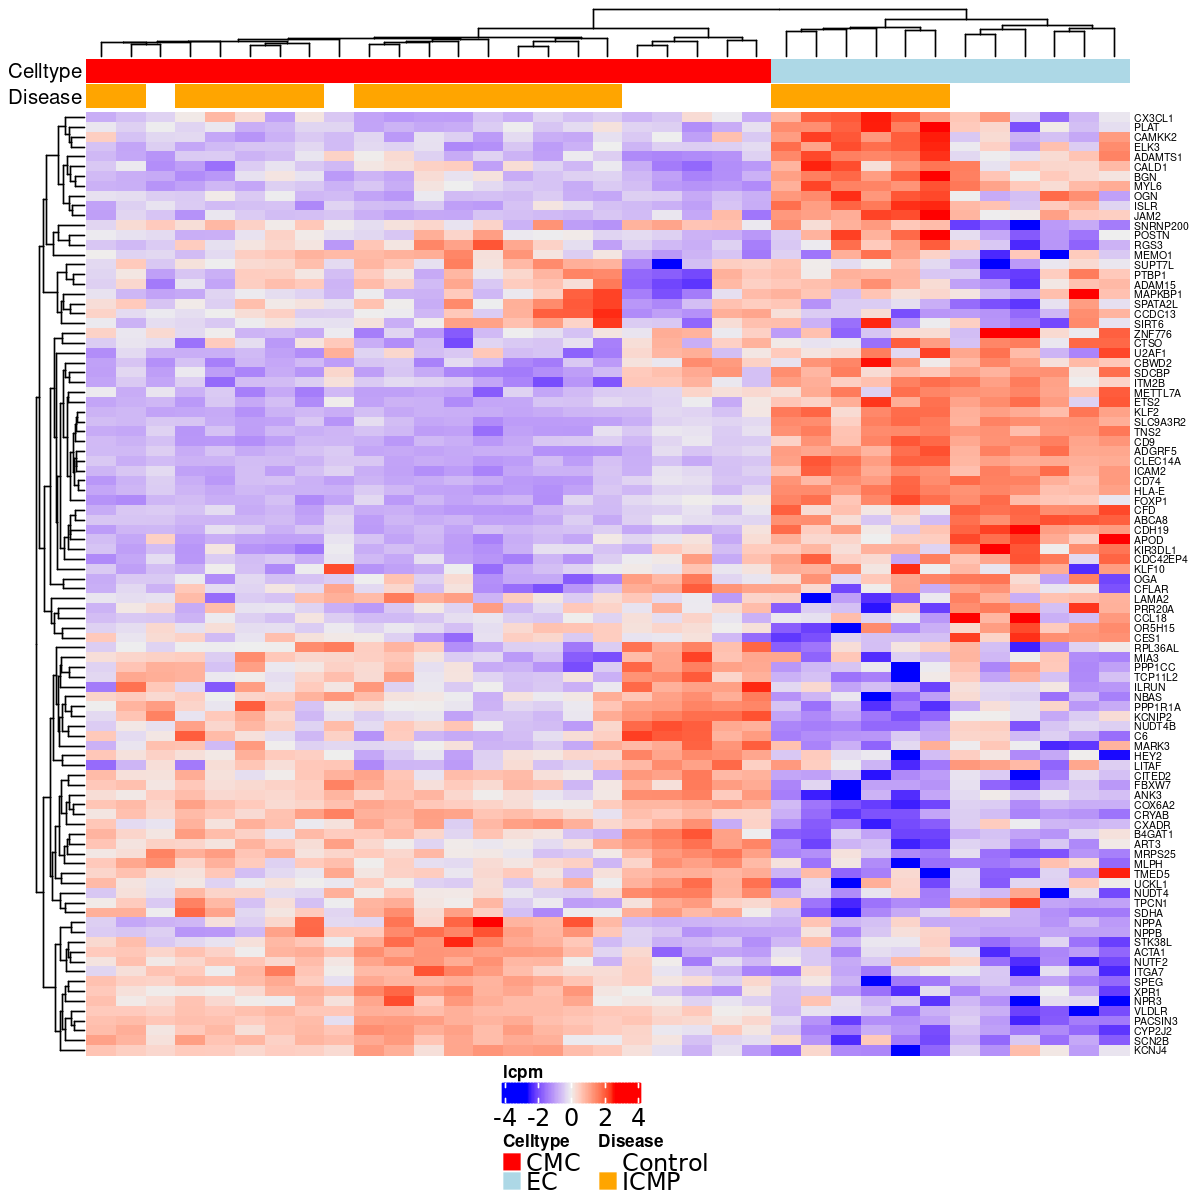

In [77]:
heatmap_adj<-heatmap_de_adj05()

In [78]:
saveRDS(heatmap_adj, file = "Figure4_heatmap_ICMP.rds")

In [80]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS:   /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRblas.so
LAPACK: /opt/applications/R/4.0.0/gnu/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.4.3      DT_0.27                  
 [3] data.table_1.14.8         fgsea_1.14.0             
 [5] RCy3_2.8.1                GSA_1.03.1               
 [7] RCurl_1.98-1.10           spatstat_3.0-3   